In [8]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist #28*28 images of hand-written digits 0-9

(x_train, y_train), (x_test, y_test) = mnist.load_data()

#We normalize because apparently it has huge effects on the model
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

#We flatten the data to 
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())

#relu = rectified linear // apparently go to activation function, tweak this to have different outcome
model.add(tf.keras.layers.Dense(192, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(192, activation=tf.nn.relu))

#Output layer, still a dense layer but it need as many units in the layer as categories we are treating. for us it's 10 categories
#also we use softmax for the activation function because it's used when dealing with probably distribution
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))


#adam optimizer is the default go to apparently
#loss is degree of error, we have to minimise loss. loss is an important metric when optimising the model
#many ways of calculating loss, categorical crossentropy seems to be used a lot. we use sparse here because it saves time in memory and computation compared to the classic one. when dealing with binary problems like telling cats and dogs appart we would have used binary_categorical_crossentropy
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

#1 epochs = training the neural network with all the data for one cycle
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2373 - accuracy: 0.9301
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0950 - accuracy: 0.9704
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0651 - accuracy: 0.9796: 0s - los


In [9]:
#watch out for overfit, we have to check the validation loss and validation accuracy
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.0920 - accuracy: 0.9737
0.09199883788824081 0.9736999869346619


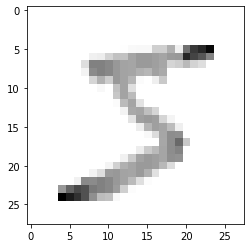

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [10]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

print(x_train[0])

In [11]:
#Saving the model
model.save('NumberGuess.model')

#Reload model
tmpModel = tf.keras.models.load_model('NumberGuess.model')

#predictions
predictions = tmpModel.predict([x_test])

#output probabilty distribution
print(predictions)

INFO:tensorflow:Assets written to: NumberGuess.model\assets
[[5.0459077e-09 4.0418321e-08 1.3309389e-05 ... 9.9894232e-01
  2.8684237e-06 1.0556241e-05]
 [2.8546392e-09 2.5870628e-04 9.9973673e-01 ... 1.4022508e-09
  1.6119289e-07 1.5800802e-11]
 [1.9068793e-07 9.9979788e-01 4.1201738e-06 ... 1.4346349e-04
  2.0602933e-05 1.1179502e-06]
 ...
 [6.0518557e-10 4.9788781e-07 1.6997188e-08 ... 7.6739278e-05
  5.5714418e-06 6.9749372e-06]
 [2.8571974e-09 4.2586514e-08 3.1020559e-09 ... 7.7901166e-07
  6.8957532e-05 2.5985027e-09]
 [4.1571141e-08 1.0686956e-10 1.5442562e-09 ... 1.7944786e-11
  3.2318797e-09 9.2801140e-12]]


In [12]:
import numpy as np

#Checking output
print(np.argmax(predictions[4]))

4


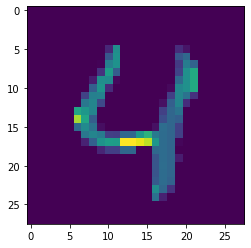

In [13]:
plt.imshow(x_test[4])
plt.show()